<a href="https://colab.research.google.com/github/ccwu0918/yolov7-colab/blob/main/YOLOv7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

下載github yolov7 repo 

* 官方：https://github.com/WongKinYiu/yolov7.git
* Fork版本有些修改：https://github.com/taipingeric/yolov7.git

步驟1：連結到自己的雲端硬碟，後續可以直接啟用辨識

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


步驟2：將路徑移動到自己的雲端硬碟

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks"
%ls -al

/content/drive/MyDrive/Colab Notebooks
total 444779
-rw------- 1 root root    90519 Jun 24 06:13  01_keras_basic_MNIST.ipynb
-rw------- 1 root root  3556556 Dec  5 16:31  01.建立Darknet網路
-rw------- 1 root root   324789 Jul  8 18:21  02-Exercise-CNN-models-pneumonia-keras.ipynb
-rw------- 1 root root    17302 Mar 21  2022 '02-TM by Webcam.ipynb'
-rw------- 1 root root   785120 Dec  5 16:12 '02.使用Darknet Webcam進行辨識'
-rw------- 1 root root   316687 Jul  8 18:21 '03-Transfer Learning-Keras.ipynb'
-rw------- 1 root root   307965 Jul  7 08:37 '「03-transfer learning-keras.ipynb」的副本'
-rw------- 1 root root   661126 Jun  2  2022  04.12-Three-Dimensional-Plotting.ipynb
-rw------- 1 root root   229505 Jul 11 16:11  05-brain-MRI-tf.keras.ipynb
-rw------- 1 root root   347813 Jul 31  2021  0.elements.ipynb
-rw------- 1 root root   189738 Jul 31  2021  0.universality_relu.ipynb
-rw------- 1 root root    11984 May  5  2020  108學年度程式語言課程期中考_答案卷.ipynb
-rw------- 1 root root     8177 May  5  2020  108學年度

步驟3：載入相依性套件

In [2]:
# import dependencies
from IPython.display import display, Javascript, HTML, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import os
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

步驟4：將Yolo v7 GitHub專案檔複製到我們的雲端硬碟

In [ ]:
# download github repo
if not os.path.exists('yolov7'):
  !git clone https://github.com/taipingeric/yolov7.git

In [ ]:
%cd yolov7

/content/drive/MyDrive/Colab Notebooks/yolov7


In [ ]:
%ls

Capture_Video.ipynb  hubconf.py         README.md         traced_model.pt
cfg/                 inference/         requirements.txt  train_aux.py
coco128/             Kinmen_Bridge.mp4  runs/             train.py
data/                LICENSE.md         scripts/          utils/
deploy/              mask-detection/    shohei.mp4        YOLOv7.ipynb
detect.py            models/            test.mp4          yolov7.pt
export.py            paper/             test.py           youtube/
figure/              __pycache__/       tools/


步驟5：安裝Yolo v7 相依性套件

In [ ]:
# 安裝套件 jedi, thop
%pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.4 MB/s 


步驟6：下載測試COCO128資料集


/coco128
*   images
    * train2017
        * img1.jpg
        * img2.jpg
    * val2017
        * img3.jpg
*   labels
    * train2017
        * img1.txt
        * img2.txt
    * val2017
        * img3.txt


txt格式 (YOLOv5)

**class id, x, y, width, height**

x,y,w,h 皆為normalized數值 0~1
```
45 0.479492 0.688771 0.955609 0.5955
45 0.736516 0.247188 0.498875 0.476417
50 0.637063 0.732938 0.494125 0.510583
45 0.339438 0.418896 0.678875 0.7815
49 0.646836 0.132552 0.118047 0.096937
49 0.773148 0.129802 0.090734 0.097229
49 0.668297 0.226906 0.131281 0.146896
49 0.642859 0.079219 0.148063 0.148062
```

In [ ]:
if not os.path.exists('coco128'):
  !curl -L https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip > coco128.zip
  !unzip -q coco128.zip
  !rm coco128.zip

步驟7：下載口罩資料集

/mask-detection
*   train
    * images
        * img1.jpg
    * labels
        * img1.txt
*   valid
    * 同train
*   test
    * 同train


txt格式 (YOLOv5)

**class id, x, y, width, height**

x,y,w,h 皆為normalized數值 0~1
```
0 0.0515 0.0251 0.0710 0.0498
1 0.3182 0.0465 0.0735 0.0902
1 0.4197 0.0535 0.0655 0.0997
```

In [10]:
if not os.path.exists('mask-detection'):
  !gdown --fuzzy '1oDXsHDx4u6zcinFDx4eS8H_zjpoAuvak'
  !unzip -q mask-detection.zip
  !rm mask-detection.zip
  !rm "/content/drive/MyDrive/Colab Notebooks/yolov7/__MACOSX" -Rf

Downloading...
From: https://drive.google.com/uc?id=1oDXsHDx4u6zcinFDx4eS8H_zjpoAuvak
To: /content/XmlToTxt/mask-detection.zip
100% 19.3M/19.3M [00:00<00:00, 79.9MB/s]


In [ ]:
# if not os.path.exists('electronic-detection'):
#   !gdown --fuzzy '1ygJWN-3bPAyU83GYn9r95DgO8PYNuQC3'
#   !mv '第二屆 全國AI圖像辨識應用競賽-大專院校.zip' 'electronic-detection.zip'
#   !unzip -q electronic-detection.zip

In [ ]:
# if not os.path.exists('traffic-signals-detection'):
#   !gdown --fuzzy '1ranatqUkVrJwrVjhQxTXeyKtdZBZm4Vd'
#   !mv '第二屆 全國AI圖像辨識應用競賽-大專院校組(決賽).zip' 'traffic-signals-detection.zip'
#   !unzip -q traffic-signals-detection.zip

可到roboflow 下載YOLOv7 format的資料集

# 修改config檔 & Training 口罩資料集

步驟8： 修改config檔



1.   data config: data/coco.yaml
    1.   刪除 ```download: bash ./scripts/get_coco.sh``` 這行
    2.   將train: `./coco/train2017.txt` 替換成訓練的圖片資料夾
```
coco128
train: ./coco128/images/train2017
val: ./coco128/images/train2017
```
```
mask detection
train: ./mask-detection/train/images
val: ./mask-detection/valid/images
test: ./mask-detection/test/images
```
    3.   nc: 80 替換成類別數 mask --> nc: 2
    4.   names: 替換成類別名稱['mask', 'no mask']
    5. 存檔
2.   model config: cfg/training/yolov7.yaml
    1. nc: 80  替換成類別數 mask --> nc: 2
    2. 存檔



In [ ]:
data_config = "data/mask-detection.yaml"
if not os.path.exists(data_config):
  !cp "data/coco.yaml" "data/mask-detection.yaml"

In [ ]:
# data_config = "data/electronic-detection.yaml"
# if not os.path.exists(data_config):
#   !cp "data/coco.yaml" "data/electronic-detection.yaml"

In [ ]:
# !sed -i '/download: bash .\/scripts\/get_coco.sh/d' data/mask-detection.yaml

data_config = "data/mask-detection.yaml"
# if os.path.exists(model_config):
!sed -i 's/download: bash/# download: bash/'  data/mask-detection.yaml

!sed -i 's/train: .\/coco\/train2017.txt/train: .\/mask-detection\/train\/images/'  data/mask-detection.yaml
!sed -i 's/val: .\/coco\/val2017.txt/val: .\/mask-detection\/valid\/images/'  data/mask-detection.yaml
!sed -i 's/test: .\/coco\/test-dev2017.txt/test: .\/mask-detection\/test\/images/'  data/mask-detection.yaml

!sed -i 's/nc: 80/nc: 2/'  data/mask-detection.yaml
!sed -i "s/names:/names: ['Mask', 'No Mask']   \n# names:/"     data/mask-detection.yaml
!sed -i "s/         'fire hydrant'/#         'fire hydrant'/"     data/mask-detection.yaml
!sed -i "s/         'elephant'/#         'elephant'/"     data/mask-detection.yaml
!sed -i "s/         'skis'/#         'skis'/"     data/mask-detection.yaml
!sed -i "s/         'tennis racket'/#         'tennis racket'/"     data/mask-detection.yaml
!sed -i "s/         'sandwich'/#         'sandwich'/"     data/mask-detection.yaml
!sed -i "s/         'potted plant'/#         'potted plant'/"     data/mask-detection.yaml
!sed -i "s/         'microwave'/#         'microwave'/"     data/mask-detection.yaml
!sed -i "s/         'hair drier'/#         'hair drier'/"     data/mask-detection.yaml

In [ ]:
model_config = "cfg/training/yolov7-custom.yaml"
if not os.path.exists(model_config):
  !cp cfg/training/yolov7.yaml cfg/training/yolov7-custom.yaml

In [ ]:
!sed -i 's/nc: 80/nc: 2/'  cfg/training/yolov7-custom.yaml

# 下載官方參數檔

步驟9：下載官方參數檔

In [ ]:
model = "yolov7.pt"
if not os.path.exists('yolov7.pt'):
  !wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

步驟10：Training 口罩資料集

In [ ]:
model = "runs/train/yolov7/weights/best.pt"
if not os.path.exists(model):
  !python train.py --workers 8 --device 0 --batch-size 8 --data data/mask-detection.yaml --img 640 640 --cfg cfg/training/yolov7-custom.yaml --weights '' --name yolov7 --hyp data/hyp.scratch.p5.yaml
  # !python train.py --workers 8 --device 0 --batch-size 8 --data data/coco.yaml --img 640 640 --cfg cfg/training/yolov7.yaml --weights '' --name yolov7 --hyp data/hyp.scratch.p5.yaml  

In [ ]:
if os.path.exists('runs/train/yolov7/weights/init.pt'):
  !rm "runs/train/yolov7/weights/init.pt"
  !rm "runs/train/yolov7/weights/last.pt"
  !rm "runs/train/yolov7/weights/epoch_000.pt"
  !rm "runs/train/yolov7/weights/epoch_024.pt"
  !rm "runs/train/yolov7/weights/epoch_049.pt"
  !rm "runs/train/yolov7/weights/epoch_074.pt"
  !rm "runs/train/yolov7/weights/epoch_099.pt"
  !rm "runs/train/yolov7/weights/epoch_124.pt"
  !rm "runs/train/yolov7/weights/epoch_149.pt"
  !rm "runs/train/yolov7/weights/epoch_174.pt"
  !rm "runs/train/yolov7/weights/epoch_199.pt"
  !rm "runs/train/yolov7/weights/epoch_224.pt"
  !rm "runs/train/yolov7/weights/epoch_249.pt"
  !rm "runs/train/yolov7/weights/epoch_274.pt"
  !rm "runs/train/yolov7/weights/epoch_295.pt"
  !rm "runs/train/yolov7/weights/epoch_296.pt"
  !rm "runs/train/yolov7/weights/epoch_297.pt"
  !rm "runs/train/yolov7/weights/epoch_298.pt"
  !rm "runs/train/yolov7/weights/epoch_299.pt"
  !rm "runs/train/yolov7/weights/best_202.pt"
  !rm "runs/train/yolov7/weights/best_203.pt"
  !rm "runs/train/yolov7/weights/best_225.pt"
  !rm "runs/train/yolov7/weights/best_238.pt"
  !rm "runs/train/yolov7/weights/best_260.pt"
  !rm "runs/train/yolov7/weights/best_261.pt"

步驟11：在 runs/train 中會存放每次訓練的過程與參數檔案

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir runs/train (started 0:00:01 ago; pid 350)


In [ ]:
%pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 6.8 MB/s 
     |████████████████████████████████| 182 kB 64.3 MB/s 
     |████████████████████████████████| 168 kB 67.6 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 168 kB 67.1 MB/s 
     |████████████████████████████████| 166 kB 79.4 MB/s 
     |████████████████████████████████| 166 kB 78.3 MB/s 
     |████████████████████████████████| 162 kB 70.7 MB/s 
     |████████████████████████████████| 162 kB 75.8 MB/s 
     |████████████████████████████████| 158 kB 77.7 MB/s 
     |████████████████████████████████| 157 kB 81.4 MB/s 
     |████████████████████████████████| 157 kB 68.6 MB/s 
     |████████████████████████████████| 157 kB 76.5 MB/s 
     |████████████████████████████████| 157 kB 61.3 MB/s 
     |████████████████████████████████| 157 kB 75.1 MB/s 
     |████████████████████████████

步驟12：Transfer Learning

In [ ]:
# finetune p5 models
# !python train.py --workers 8 --device 0 --batch-size 8 --data data/coco.yaml --img 640 640 --cfg cfg/training/yolov7-custom.yaml --weights 'yolov7_training.pt' --name yolov7-custom --hyp data/hyp.scratch.custom.yaml
# !python train.py --workers 8 --device 0 --batch-size 8 --data data/coco.yaml --img 640 640 --cfg cfg/training/yolov7.yaml --weights 'runs/train/yolov7/weights/best.pt' --name yolov7-custom --hyp data/hyp.scratch.custom.yaml
# !python train.py --workers 8 --device 0 --batch-size 8 --data data/coco.yaml --img 640 640 --cfg cfg/training/yolov7-custom.yaml --weights 'runs/train/yolov7/weights/best.pt' --name yolov7-custom --hyp data/hyp.scratch.custom.yaml
# !python train.py --workers 8 --device 0 --batch-size 8 --data data/mask-detection.yaml --img 640 640 --cfg cfg/training/yolov7-custom.yaml --weights './yolov7.pt' --name yolov7-custom --hyp data/hyp.scratch.custom.yaml

# finetune p6 models
# !python train_aux.py --workers 8 --device 0 --batch-size 16 --data data/custom.yaml --img 1280 1280 --cfg cfg/training/yolov7-w6-custom.yaml --weights 'yolov7-w6_training.pt' --name yolov7-w6-custom --hyp data/hyp.scratch.custom.yaml
# !python train_aux.py --workers 8 --device 0 --batch-size 16 --data data/mask-detection.yaml --img 1280 1280 --cfg cfg/training/yolov7-custom.yaml --weights './yolov7.pt' --name yolov7-custom --hyp data/hyp.scratch.custom.yaml

步驟13： Testing

In [ ]:
# !python test.py --data data/coco.yaml --img 640 --batch 32 --conf 0.001 --iou 0.65 --device 0 --weights runs/train/yolov7/weights/best.pt --name yolov7_640_val
model = "runs/train/yolov7/weights/best.pt"
if os.path.exists(model):
  !python test.py --data data/mask-detection.yaml --img 640 --batch 32 --conf 0.001 --iou 0.65 --device 0 --weights runs/train/yolov7/weights/best.pt --name yolov7_640_val

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/mask-detection.yaml', device='0', exist_ok=False, img_size=640, iou_thres=0.65, name='yolov7_640_val', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['runs/train/yolov7/weights/best.pt'])
YOLOR 🚀 2022-12-5 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved

步驟14： Inference 驗證模型辨識結果

In [ ]:
import google.colab.patches as colab #載入 google.colab 函式庫 並以colab代稱
# 因opencv 的 顯示照片與google 的函數有衝突 故載入 google.colab 函式庫
import cv2 #載入 opencv 函式庫
import numpy #載入numpy 函式庫
import matplotlib.pyplot as plt #載入matplotlib 繪圖函式庫

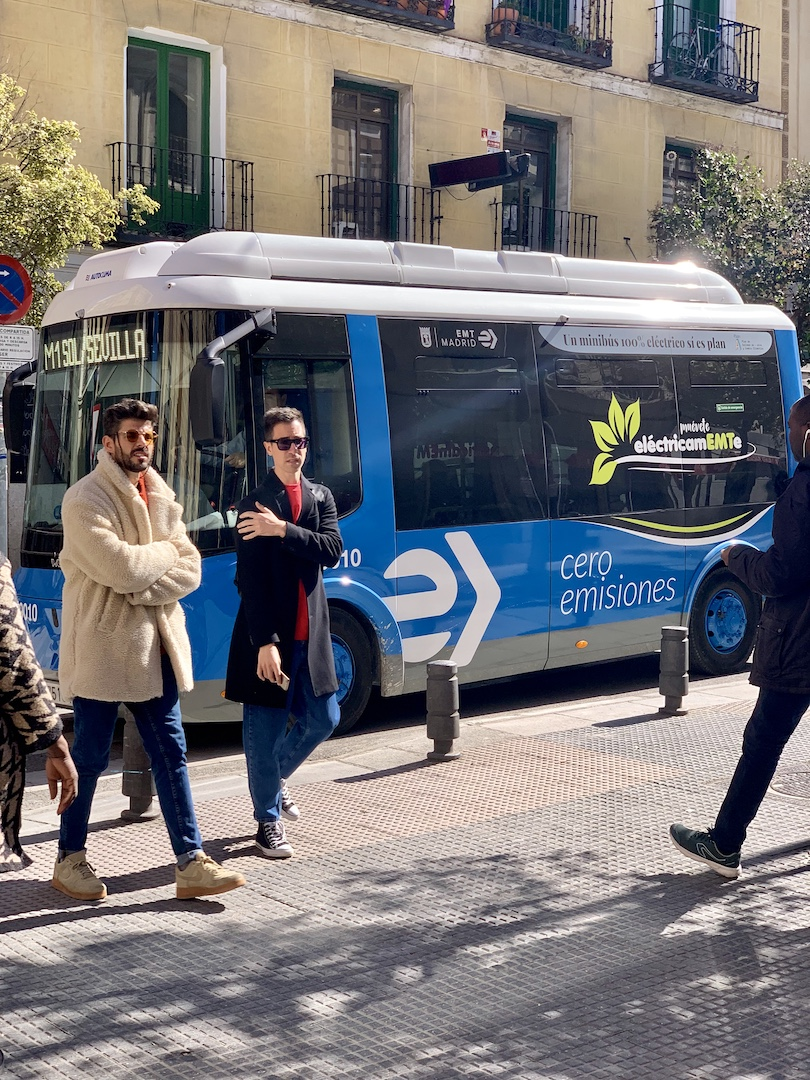

In [ ]:
img_file = "inference/images/bus.jpg"
source_mat = cv2.imread(img_file) 
# 密技=>如何複製路徑=>三點點=>複製路徑=>貼上路徑
colab.cv2_imshow(source_mat)

In [ ]:
!rm runs/detect -Rf

In [ ]:
model = 'runs/train/yolov7/weights/best.pt'
if os.path.exists(model):
  !python detect.py --weights runs/train/yolov7/weights/best.pt --conf 0.25 --img-size 640 --source inference/images/bus.jpg

  # !python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source inference/images/horses.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='inference/images/bus.jpg', update=False, view_img=False, weights=['runs/train/yolov7/weights/best.pt'])
YOLOR 🚀 2022-12-5 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

 The

步驟15：在runs/detect/exp*/  看照片偵測後的成果

In [ ]:
%ls runs/detect/exp*/

bus.jpg


## Colab 上傳檔案


In [ ]:
# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

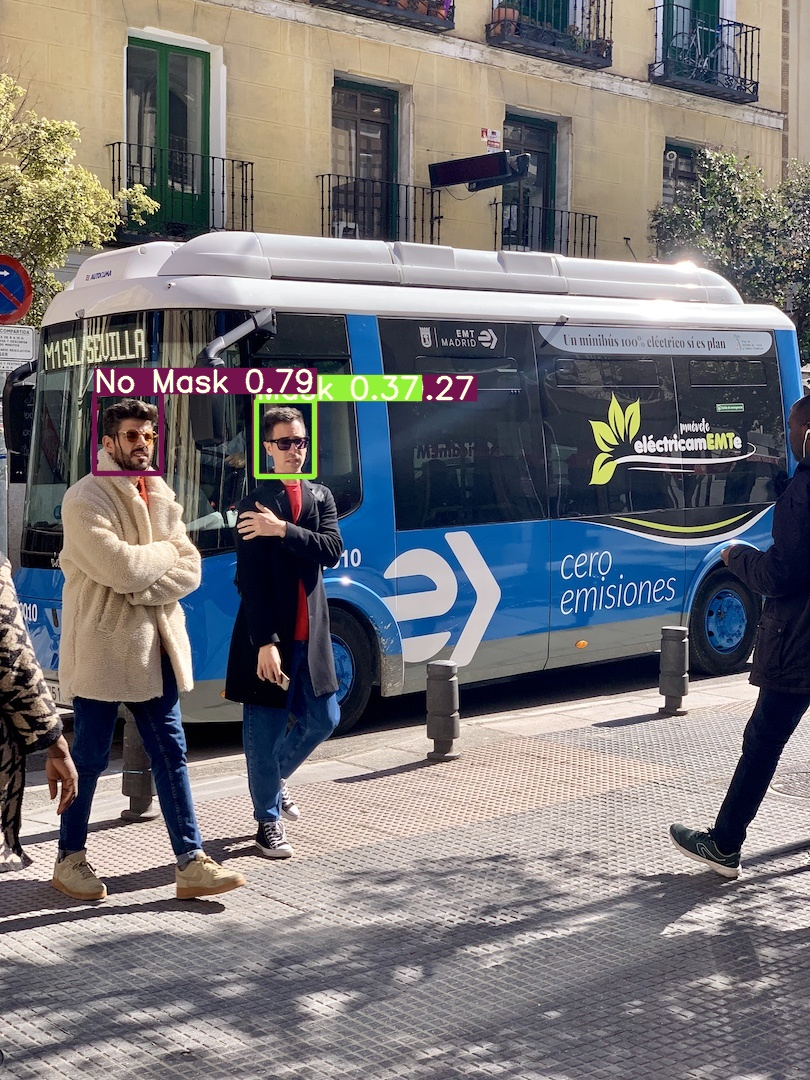

In [ ]:
img_file = "runs/detect/exp/bus.jpg"
source_mat = cv2.imread(img_file) 
# 密技=>如何複製路徑=>三點點=>複製路徑=>貼上路徑
colab.cv2_imshow(source_mat)

步驟16：Inference on Video

e.g: https://www.youtube.com/watch?v=ZlAR2II5fNc

In [ ]:
video_path = "/content/drive/MyDrive/Colab Notebooks/yolov7/shohei.mp4"
if not os.path.exists(video_path):
  !gdown --fuzzy 1oHVViy5V11V80aSPtX55JKJ5G4Wz1wLE

In [ ]:
from IPython.display import display, Javascript,HTML
from google.colab.output import eval_js
from base64 import b64decode

def show_video(video_path, video_width = 600):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [ ]:
def record_video(filename):
  js=Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");

      capture.textContent = "Start Recording";
      capture.style.background = "orange";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});

      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);

      video.srcObject = stream;
      video.muted = true;

      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);

      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();

      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
    return btoa(binaryString);
    }
  """)
  try:
    display(js)
    data=eval_js('recordVideo({})')
    binary=b64decode(data)
    with open(filename,"wb") as video_file:
      video_file.write(binary)
    print(f"Finished recording video at:{filename}")
  except Exception as err:
    print(str(err))

In [ ]:
video_path = "/content/drive/MyDrive/Colab Notebooks/yolov7/shohei.mp4"
if os.path.exists(video_path):
  print(video_path)
show_video(video_path)

In [ ]:
# Pytube：下載Youtube影片
%pip install pytube 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 4.4 MB/s 


In [ ]:
from pytube import YouTube
     
yt = YouTube('https://www.youtube.com/watch?v=O3w-qB5f-tc')
     
print(yt.title)
print(yt.streams)
     
# yt.streams.first().download("youtube")
# yt.streams.filter(subtype='mp4', res='360p', progressive=True).first().download("youtube")
yt.streams.filter(subtype='mp4')[1].download("youtube")

金門大橋蓋10年今通車　正式連接大小金門｜#鏡新聞
[<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="8fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" pro

'/content/drive/MyDrive/Colab Notebooks/yolov7/youtube/金門大橋蓋10年今通車\u3000正式連接大小金門｜鏡新聞.mp4'

In [ ]:
video_path = "/content/drive/MyDrive/Colab Notebooks/yolov7/youtube/金門大橋蓋10年今通車　正式連接大小金門｜鏡新聞.mp4"
if os.path.exists(video_path):
  print(video_path)
  !cp "/content/drive/MyDrive/Colab Notebooks/yolov7/youtube/金門大橋蓋10年今通車　正式連接大小金門｜鏡新聞.mp4" "/content/drive/MyDrive/Colab Notebooks/yolov7/Kinmen_Bridge.mp4"

/content/drive/MyDrive/Colab Notebooks/yolov7/youtube/金門大橋蓋10年今通車　正式連接大小金門｜鏡新聞.mp4


In [ ]:
video_path = "/content/drive/MyDrive/Colab Notebooks/yolov7/Kinmen_Bridge.mp4"
if os.path.exists(video_path):
  print(video_path)
show_video(video_path)

In [ ]:
model = "yolov7.pt"
if os.path.exists(model):
  !python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source shohei.mp4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='shohei.mp4', update=False, view_img=False, weights=['yolov7.pt'])
YOLOR 🚀 2022-12-5 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
video 1/1 (1/313) /content/drive/MyDrive/Colab Notebooks/yolov7/shohe

In [ ]:
%ls runs/detect/exp*/

runs/detect/exp/:
bus.jpg

runs/detect/exp2/:
shohei.mp4


In [ ]:
video_path = "runs/detect/exp2/shohei.mp4"
if os.path.exists(video_path):
  print(video_path)
show_video(video_path)

## Colab 下載檔案

In [ ]:
from google.colab import files
files.download(video_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = 'runs/train/yolov7/weights/best.pt'
if os.path.exists(model):
  !python detect.py --weights runs/train/yolov7/weights/best.pt --conf 0.25 --img-size 640 --source shohei.mp4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='shohei.mp4', update=False, view_img=False, weights=['runs/train/yolov7/weights/best.pt'])
YOLOR 🚀 2022-12-5 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36487166 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

video 1/1 (1/313) 

步驟17：在 runs/detect/最後的實驗資料夾中。找尋並下載影片檔

In [ ]:
%ls runs/detect/exp*/

runs/detect/exp/:
bus.jpg

runs/detect/exp2/:
shohei.mp4

runs/detect/exp3/:
shohei.mp4


In [ ]:
video_path = "runs/detect/exp3/shohei.mp4"
if os.path.exists(video_path):
  print(video_path)
show_video(video_path)

In [ ]:
from google.colab import files
files.download(video_path)

In [ ]:
video_path = "test.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

In [ ]:
model = "yolov7.pt"
if os.path.exists(model):
  !python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source "test.mp4"

In [ ]:
%ls runs/detect/exp*/

In [ ]:
video_path = "runs/detect/exp4/test.mp4"
if os.path.exists(video_path):
  print(video_path)
show_video(video_path)

In [ ]:
from google.colab import files
files.download(video_path)

#### More configs

cfg/training/yolov7.yaml


```yaml
# parameters
nc: 80  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# yolov7 backbone
# Conv: ch_out, kernel, stride, padding, groups
backbone:
  # [from, number, module, args]
  # Stage 0
  [[-1, 1, Conv, [32, 3, 1]],  # 0
   # Stage 1
   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2
   [-1, 1, Conv, [64, 3, 1]],
   # Stage 2
   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4
   # ELAN, 256
   [-1, 1, Conv, [64, 1, 1]],  # -6
   [-2, 1, Conv, [64, 1, 1]],  # -5
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],  # -3
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],  # -1
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],  # 11
   # Stage 3
   # Down c_out = 256
   [-1, 1, MP, []], # MP: MaxPooling
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 16-P3/8
   # ELAN, 512
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]],  # 24
   # Stage 4
   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 29-P4/16
   # ELAN, 1024
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 37
   # Stage 5
   [-1, 1, MP, []],
   [-1, 1, Conv, [512, 1, 1]],
   [-3, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [512, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 42-P5/32
   # ELAN, 1024
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 50
  ]

# yolov7 head
head:
  # Stage: 5
  [[-1, 1, SPPCSPC, [512]], # 51
   # Stage 4
   # *2 Up, 512
   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [37, 1, Conv, [256, 1, 1]], # route backbone P4
   [[-1, -2], 1, Concat, [1]],
   # ELAN, 256
   [-1, 1, Conv, [256, 1, 1]], # -6
   [-2, 1, Conv, [256, 1, 1]], # -5
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 63
   # Stage 3
   # *2 Up, 512
   [-1, 1, Conv, [128, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [24, 1, Conv, [128, 1, 1]], # route backbone P3
   [[-1, -2], 1, Concat, [1]],
   # ELAN, 128
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [128, 1, 1]], # 75
   # Stage 4
   # Down, 512
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3, 63], 1, Concat, [1]],
   # ELAN, 256
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 88
   # Stage 5
   # Down, 1024
   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3, 51], 1, Concat, [1]],
   # ELAN, 512
   [-1, 1, Conv, [512, 1, 1]],
   [-2, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]], # 101
   
   [75, 1, RepConv, [256, 3, 1]],
   [88, 1, RepConv, [512, 3, 1]],
   [101, 1, RepConv, [1024, 3, 1]],

   [[102,103,104], 1, IDetect, [nc, anchors]],   # Detect(P3, P4, P5)
  ]

```

#### Important Files

yolov7



*   train.py: 訓練script
*   test.py: 測試script
* detect.py: 偵測圖片或影片
* cfg/: 模型架構設定檔
* data/: 資料集設定檔
    * coco.yaml: 範例格式
    * hyp.*.yaml: 超參數設定
* models/: 模型程式碼
    * yolo.py
        * parse_model: yaml config轉模型
    * common.py: 網路層
* paper/: 論文pdf (含附錄)
* tools/: demo 筆記本檔
* utils/: 其他程式碼




---



In [6]:
!git clone https://github.com/Isabek/XmlToTxt

Cloning into 'XmlToTxt'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 105 (delta 21), reused 19 (delta 17), pack-reused 76
Receiving objects: 100% (105/105), 16.68 KiB | 8.34 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [7]:
%cd XmlToTxt

/content/XmlToTxt


In [8]:
%pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!python xmltotxt.py -xml xml -out out2



---





1.   Day 13 - 半自動標籤圖片的方法與實作 https://ithelp.ithome.com.tw/articles/10263494
2.   YOLO訓練流程與資料集YOLO txt格式 https://ithelp.ithome.com.tw/articles/10307097
3.   Python影像辨識筆記(九之六)：將LabelImg標記的xml檔案轉成txt檔案 https://yanwei-liu.medium.com/python影像辨識筆記-九之六-將labelimg標記的xml檔案轉成txt檔案-f484c7bbe032
4. 最新的物件偵測王者 YOLOv7 介紹 https://d246810g2000.medium.com/最新的物件偵測王者-yolov7-介紹-206c6adf2e69
5. 最新的物件偵測王者 YOLOv7 介紹 https://aiacademy.tw/yolov7/
6. RepVGG：极简架构，SOTA性能，让VGG式模型再次伟大（CVPR-2021） https://zhuanlan.zhihu.com/p/344324470
7. labelImg https://github.com/tzutalin/labelImg/files/2638199/windows_v1.8.1.zip